In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA, SparsePCA, FactorAnalysis

# Загрузка данных

In [3]:
# 1. Загрузить датасет по ссылке: https://www.kaggle.com/uciml/glass . Данные представлены в
#    виде csv таблицы.
# 2. Создать Python скрипт. Загрузить датасет в датафрейм, и разделить данные на
#    описательные признаки и признак отображающий класс.
df = pd.read_csv('glass.csv')
var_names = list(df.columns)  # получение имен признаков
labels = df.to_numpy('int')[:, -1]  # метки классов
data = df.to_numpy('float')[:, :-1]  # описательные признаки

In [4]:
# 3. Провести нормировку данных к интервалу [0 1]
data = preprocessing.minmax_scale(data)

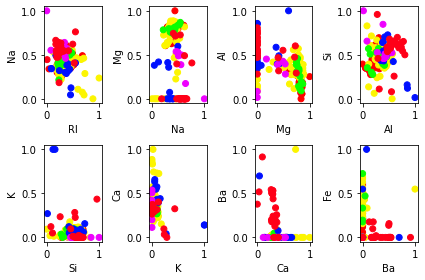

In [5]:
# 4. Построить диаграммы рассеяния для пар признаков.
fig, axs = plt.subplots(2, 4)
for i in range(data.shape[1] - 1):
    axs[i // 4, i % 4].scatter(data[:, i], data[:, (i + 1)], c=labels, cmap='hsv')
    axs[i // 4, i % 4].set_xlabel(var_names[i])
    axs[i // 4, i % 4].set_ylabel(var_names[i + 1])
plt.tight_layout()
plt.show()

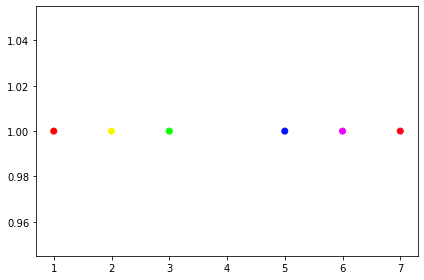

In [40]:
# Самостоятельно определите соответствие цвета на диаграмме и класса в датасете
unique = np.unique(labels)
plt.scatter(unique, [1]*len(unique), c=unique, cmap='hsv')
plt.tight_layout()
plt.show()

# Метод главных компонент

In [38]:
# 1. Используя метод главных компонент (PCA). Проведите понижение размерности
#    пространства до размерности 2
pca = PCA(n_components=2)
pca_data = pca.fit(data).transform(data)

In [39]:
# 2. Выведите значение объясненной дисперсии в процентах и собственные числа
#    соответствующие компонентам
print(pca.explained_variance_ratio_ * 100)
print(pca.singular_values_)

[45.42956891 17.9900973 ]
[5.1049308  3.21245688]


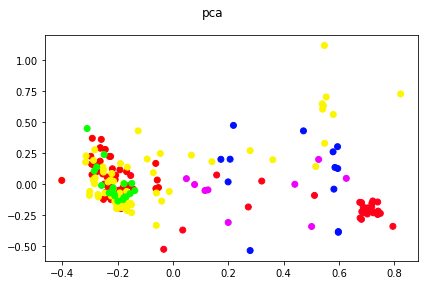

In [8]:
# 3. Постройте диаграмму рассеяния после метода главных компонент
plt.suptitle('pca')
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='hsv')
plt.tight_layout()
plt.show()

In [41]:
# 4. Проанализируйте и обоснуйте полученные результаты

In [10]:
# 5. Изменяя количество компонент, определите количество при котором компоненты
#    объясняют не менее 85% дисперсии данных
for n in range(data.shape[1]):
    pca_n = PCA(n_components=n).fit(data)
    print(n, ':', sum(pca_n.explained_variance_ratio_))

0 : 0
1 : 0.45429568907468526
2 : 0.634196662104278
3 : 0.7606912558548664
4 : 0.8586697305102718
5 : 0.9272937149511479
6 : 0.9694347221994033
7 : 0.9955326243472864
8 : 0.9998605862637865


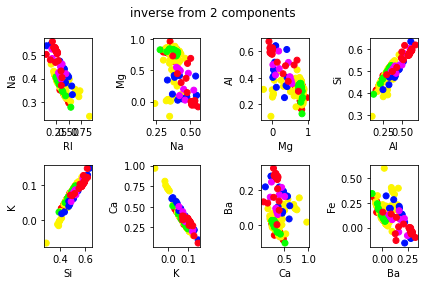

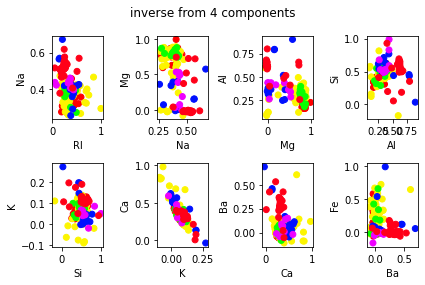

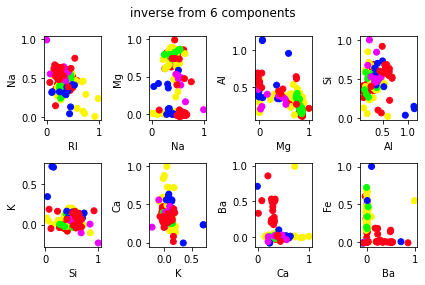

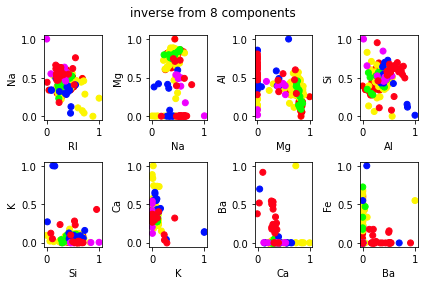

In [19]:
# 6. Используя метод inverse_transform восстановите данные, сравните с исходными
for n in range(2, 9, 2):
    pca = PCA(n_components=n)
    pca_data = pca.fit(data).transform(data)
    inversed_data = pca.inverse_transform(pca_data)
    fig, axs = plt.subplots(2, 4)
    for i in range(data.shape[1] - 1):
        axs[i // 4, i % 4].scatter(inversed_data[:, i], inversed_data[:, (i + 1)], c=labels, cmap='hsv')
        axs[i // 4, i % 4].set_xlabel(var_names[i])
        axs[i // 4, i % 4].set_ylabel(var_names[i + 1])
    plt.suptitle('inverse from ' + str(n) + ' components')
    plt.tight_layout()
    plt.show()

2 auto : ratio 0.634196662104278 in 0.0069963932037353516 s
2 full : ratio 0.634196662104278 in 0.0018379688262939453 s
2 arpack : ratio 0.634196662104278 in 0.4258880615234375 s
2 randomized : ratio 0.6341966621042786 in 0.05556368827819824 s

4 auto : ratio 0.8586697305102718 in 0.0036165714263916016 s
4 full : ratio 0.8586697305102718 in 0.012143373489379883 s
4 arpack : ratio 0.8586697305102717 in 0.009063005447387695 s
4 randomized : ratio 0.8586697305102715 in 0.0039441585540771484 s

6 auto : ratio 0.9694347221994033 in 0.0028450489044189453 s
6 full : ratio 0.9694347221994033 in 0.0011112689971923828 s
6 arpack : ratio 0.9694347221994031 in 0.005422115325927734 s
6 randomized : ratio 0.969434722199403 in 0.0033032894134521484 s

8 auto : ratio 0.9998605862637865 in 0.0024139881134033203 s
8 full : ratio 0.9998605862637865 in 0.0011773109436035156 s
8 arpack : ratio 0.9998605862637866 in 0.005196332931518555 s
8 randomized : ratio 0.9998605862637872 in 0.036295175552368164 s



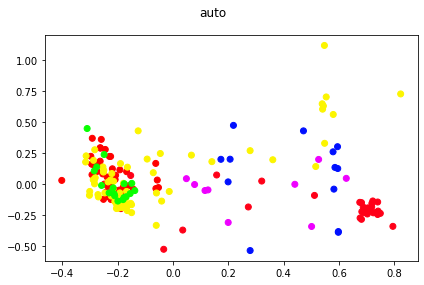

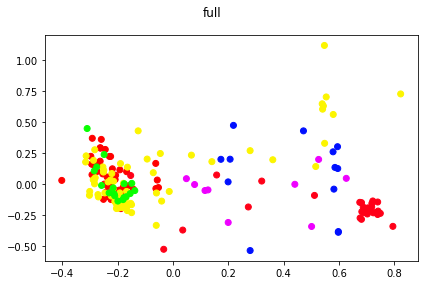

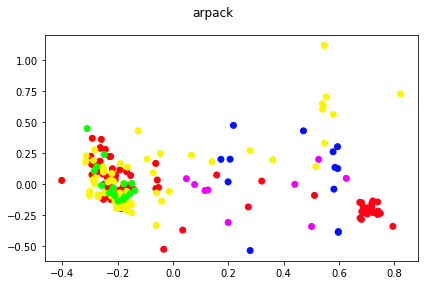

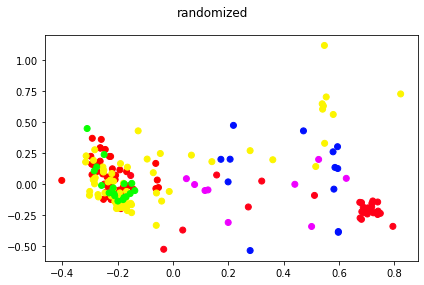

In [42]:
# 7. Исследуйте метод главных компонент при различных параметрах svd_solver

import time

svd_solvers = ['auto', 'full', 'arpack', 'randomized']
for n in range(2, data.shape[1], 2):
    for s in svd_solvers:
        start_time = time.time()
        pca_n = PCA(n_components=n, svd_solver=s).fit(data)
        pca_n_data = pca_n.transform(data)
        print(n, s, ': ratio', sum(pca_n.explained_variance_ratio_), 'in', time.time() - start_time, 's')
    print()

n = 2
for s in svd_solvers:
    pca_n = PCA(n_components=n, svd_solver=s).fit(data)
    pca_n_data = pca_n.transform(data)
    plt.scatter(pca_n_data[:, 0], pca_n_data[:, 1], c=labels, cmap='hsv')
    plt.suptitle(s)
    plt.tight_layout()
    plt.show()

# Модификации метода главных компонент

2 linear : 0.306396484375 s
2 poly : 0.01939535140991211 s
2 rbf : 0.5858860015869141 s
2 sigmoid : 0.03866863250732422 s
2 cosine : 0.011745691299438477 s

4 linear : 0.00761866569519043 s
4 poly : 0.01421666145324707 s
4 rbf : 0.013158321380615234 s
4 sigmoid : 0.015854835510253906 s
4 cosine : 0.009826898574829102 s

6 linear : 0.023562192916870117 s
6 poly : 0.018614530563354492 s
6 rbf : 0.018798828125 s
6 sigmoid : 0.022713184356689453 s
6 cosine : 0.05688667297363281 s

8 linear : 0.010929346084594727 s
8 poly : 0.0176699161529541 s
8 rbf : 0.013443470001220703 s
8 sigmoid : 0.020114421844482422 s
8 cosine : 0.024050474166870117 s



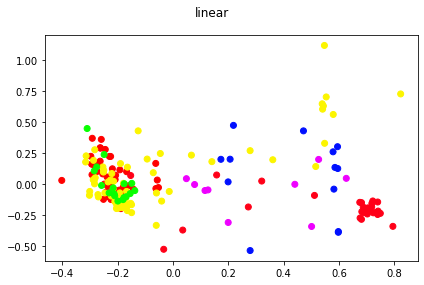

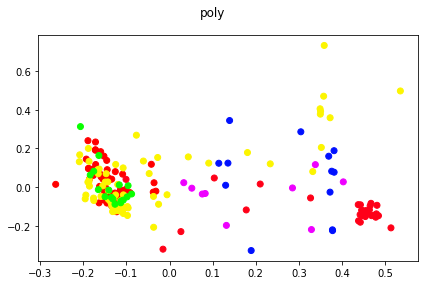

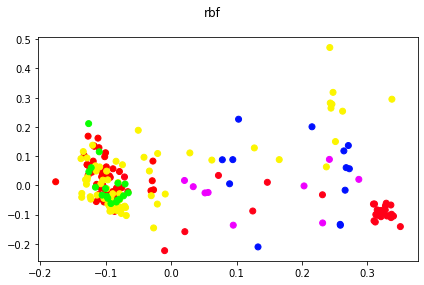

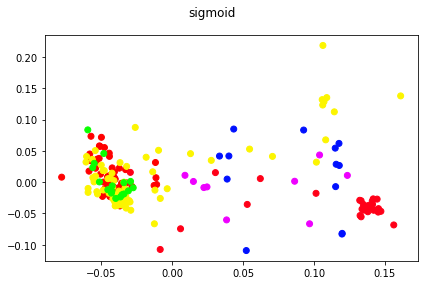

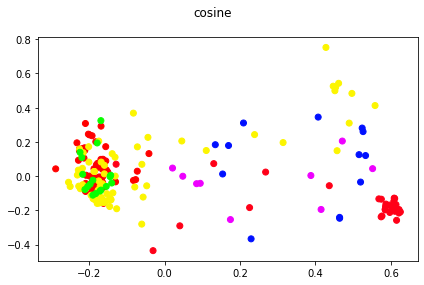

In [43]:
# 1. По аналогии с PCA исследуйте KernelPCA для различных параметров kernel и различных
#    параметрах для ядра
kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'cosine']

for n in range(2, 9, 2):
    for k in kernels:
        start_time = time.time()
        kpca_n = KernelPCA(n_components=n, kernel=k).fit(data)
        kpca_n_data = kpca_n.transform(data)
        print(n, k, ':', time.time() - start_time, 's')
    print()

n = 2
for k in kernels:
    kpca_n = KernelPCA(n_components=n, kernel=k).fit(data)
    kpca_n_data = kpca_n.transform(data)
    plt.scatter(kpca_n_data[:, 0], kpca_n_data[:, 1], c=labels, cmap='hsv')
    plt.suptitle(k)
    plt.tight_layout()
    plt.show()

In [ ]:
# 2. Определите, при каких параметрах KernelPCA работает также как PCA

2 lars : 0.38828372955322266 s
2 cd : 0.12188553810119629 s

4 lars : 0.05005359649658203 s
4 cd : 0.01860809326171875 s

6 lars : 0.1327214241027832 s
6 cd : 0.10652923583984375 s

8 lars : 0.22406959533691406 s
8 cd : 0.09517073631286621 s



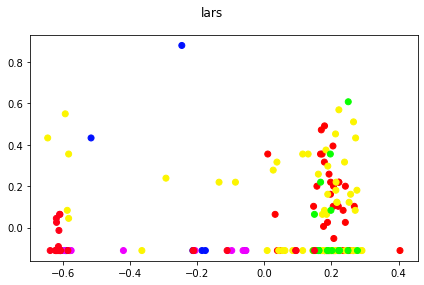

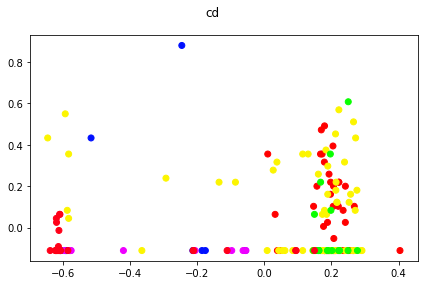

In [44]:
# 3. Аналогично исследуйте SparcePCA

methods = ['lars', 'cd']

for n in range(2, 9, 2):
    for m in methods:
        start_time = time.time()
        spca = SparsePCA(n_components=n, method=m).fit(data)
        spca_n_data = spca.transform(data)
        print(n, m, ':', time.time() - start_time, 's')
    print()

n = 2
for m in methods:
    spca = SparsePCA(n_components=n, method=m).fit(data)
    spca_n_data = spca.transform(data)
    plt.scatter(spca_n_data[:, 0], spca_n_data[:, 1], c=labels, cmap='hsv')
    plt.suptitle(m)
    plt.tight_layout()
    plt.show()

In [68]:
# 4. Проанализируйте и обоснуйте полученные результаты
spca = SparsePCA(n_components=2).fit(data)
spca.components_

array([[ 0.        ,  0.        ,  0.99804243, -0.03718353,  0.        ,
         0.        ,  0.        , -0.0502861 ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ]])

# Факторный анализ

In [ ]:
# 1. Проведите понижении размерности используя факторный анализ FactorAnalysis

svd_methods = ['lapack', 'randomized']

for n in range(2, 9, 2):
    for m in svd_methods:
        start_time = time.time()
        fa = FactorAnalysis(n_components=n, svd_method=m).fit(data)
        fa_n_data = fa.transform(data)
        spca_n_data = spca.transform(data)
        print(n, m, ':', time.time() - start_time, 's')
    print()

n = 2
for m in svd_methods:
    fa = FactorAnalysis(n_components=n, svd_method=m).fit(data)
    fa_n_data = fa.transform(data)
    plt.scatter(fa_n_data[:, 0], fa_n_data[:, 1], c=labels, cmap='hsv')
    plt.suptitle(m)
    plt.tight_layout()
    plt.show()

2 lapack : 0.32977724075317383 s
2 randomized : 0.4400608539581299 s

4 lapack : 0.10771560668945312 s
4 randomized : 0.49739980697631836 s

6 lapack : 0.07892274856567383 s
6 randomized : 0.3307662010192871 s

8 lapack : 0.03267312049865723 s
8 randomized : 0.12043333053588867 s



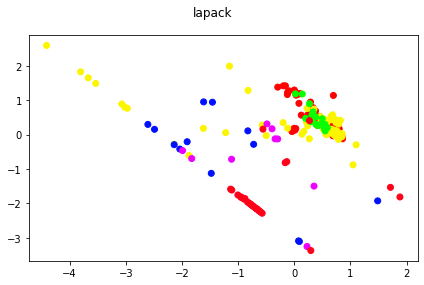

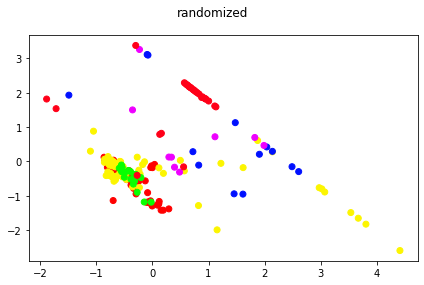

In [45]:
# 2. Сравните полученные результаты с PCA

In [ ]:
# 2. Сравните полученные результаты с PCA

In [ ]:
# 3. Объясните в чем разница между методом главных компонент и факторным анализом